## In this notebook, we are analyzing a few physical properties of a graph to better understand the graph structure

In [1]:
import csv
import pandas as pd
from pandas import DataFrame
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
import collections
import os

In [15]:
def build_graph(filepath):
    
    df_graph = pd.read_csv(filepath, sep='\t')
    graph = nx.Graph()

    for i in range (len(df_graph)):
        row = df_graph.iloc[i, :]
        graph.add_edge(row[1], row[3])
        graph[row[1]][row[3]]['predicate'] = row[2]
        
    print('Graph loaded successfully.')
    return graph
        
        
def draw_graph(graph):
    
    options = {
        'node_color': 'green',
        'edge_color': 'black',
        'node_size': 10,
        'width': 0.1,
        'alpha': 1,
    }
    plt.figure(figsize=(10,10))
    nx.draw(graph, **options, with_labels=False)
    

def calculate_clustering_coef(graph):

    clustering_coefficients = []
    global_clustering_coefficients = nx.clustering(graph)
    for node, cc in global_clustering_coefficients.items():
        clustering_coefficients.append({'node': node,
                                        'clustering coefficient': cc})

    for row in clustering_coefficients:
        print('{}: {}'.format(row['node'], row['clustering coefficient']))
        
        
def average_degree(E,V):
    return 2*E/V


def calculate_subgraphs(graph):
    
    subgraph_list = 0

    for conn_component in nx.connected_components(graph):
        subgraph_list += 1

    return subgraph_list

#### Loading 'yagoWikipediaInfo_fa.tsv', a subgraph of YAGO graph 

In [16]:
yagoGraph = build_graph('yagoWikipediaInfo_fa.tsv')

Graph loaded successfully.


In [17]:
edge_count = yagoGraph.number_of_edges()
node_count = yagoGraph.number_of_nodes()

print('================= GRAPH PROPERTIES =================\n')
print(f'Number of edges: {edge_count}')
print(f'Number of nodes: {node_count}')
print(f'Graph density: {nx.classes.function.density(yagoGraph)}')
print(f'Average degree: {average_degree(edge_count, node_count)}')
print(f'Number of subgraphs: {calculate_subgraphs(yagoGraph)}')

================= GRAPH PROPERTIES =================

Number of edges: 3496397
Number of nodes: 929570
Graph density: 8.092580034470046e-06
Average degree: 7.522611530062287
Number of subgraphs: 43


<ipython-input-18-f026779faa21>:22: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.loglog(rank, freq, basex=10)


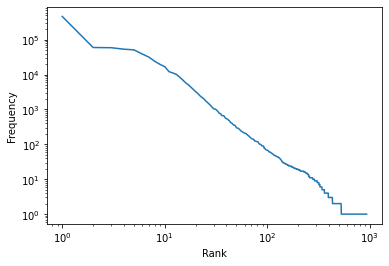

In [18]:
def plot_rand_freq_plot():
    
    rf_table = []
    degree = []
    frequency = []
    degree_distribution = collections.Counter(degrees)
    degree_distribution_list = degree_distribution.most_common(len(degree_distribution))
    top_frequency = degree_distribution_list[0][1]
    for index, item in enumerate(degree_distribution_list, start=1):
        rf_table.append({'rank': index,
                         'degree': item[0],
                         'frequency': item[1],
                         'relative frequency':'1/{}'.format(index)})

    freq_list = list(degree_distribution.values())

    rank = [row['rank'] for row in rf_table]
    freq = [row['frequency'] for row in rf_table]

    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.loglog(rank, freq, basex=10)

plot_rand_freq_plot()

In [19]:
print("|  Rank    |  degree    |  Frequency |Zipf fraction|")
format_string = "|{:10}|{:12}|{:12.0f}|{:>12}|"
for index, item in enumerate(rf_table, start=1):
    print(format_string.format(item["rank"],
                               item["degree"],
                               item["frequency"],
                               item["relative frequency"]))

|  Rank    |  degree    |  Frequency |Zipf fraction|
|         1|           1|      462768|         1/1|
|         2|           5|       59551|         1/2|
|         3|           7|       58790|         1/3|
|         4|           6|       53329|         1/4|
|         5|           4|       51002|         1/5|
|         6|           3|       39041|         1/6|
|         7|           8|       31612|         1/7|
|         8|           9|       23869|         1/8|
|         9|          10|       19492|         1/9|
|        10|          11|       16808|        1/10|
|        11|          12|       12090|        1/11|
|        12|           2|       11073|        1/12|
|        13|          13|       10074|        1/13|
|        14|          14|        8364|        1/14|
|        15|          15|        6950|        1/15|
|        16|          16|        5781|        1/16|
|        17|          17|        5062|        1/17|
|        18|          18|        4344|        1/18|
|        19